In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

 - https://stackoverflow.com/questions/78665686/calculate-distance-to-the-nearest-object/78665756#78665756
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
 

In [24]:
x_value = np.arange(0, 10000, 50)  
y_value = np.arange(0, 5000, 50)
X, Y = np.meshgrid(x_value, y_value)
points = np.stack([X.ravel(), Y.ravel()]).T

In [25]:
x_well = np.array([500, 1500, 4000, 5500, 6250, 7500, 8000, 9000])
y_well = np.array([500, 4000, 2000, 1500, 500, 5000, 100, 2500])
wells = np.stack([x_well, y_well]).T

In [26]:
interpolator = spatial.KDTree(wells)

In [39]:
distances, indices = interpolator.query(points)

In [40]:
%timeit -r 30 -n 100 distances, indices = interpolator.query(points)

5.84 ms ± 1.57 ms per loop (mean ± std. dev. of 30 runs, 100 loops each)


In [33]:
voronoi = spatial.Voronoi(wells)

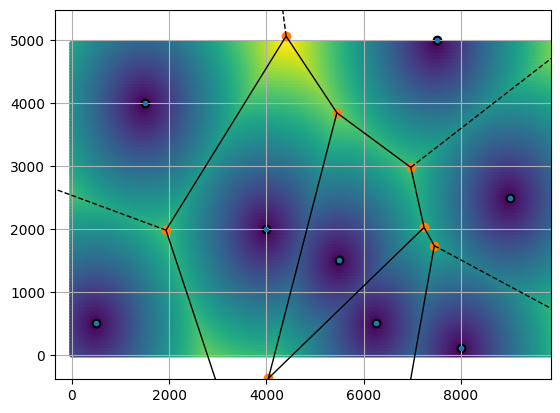

In [36]:
fig, axe = plt.subplots()
axe.scatter(*points.T, marker=".", c=distances)
axe.scatter(*wells.T, color="black")
spatial.voronoi_plot_2d(voronoi, ax=axe)
axe.grid()